<a href="https://colab.research.google.com/github/fasihfast/demand_forecasting_for_retail/blob/main/Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**About DataSet**
This a data set comprising of 169211 entries of Retail Store's different WareHouses.This data set is a 12 months dataset year 2016 having 169211 unique products

## Data loading


Load the "Retail_Dataset2.csv" file.


In [ ]:
import pandas as pd

try:
    df_org = pd.read_csv('Retail_Dataset2.csv')
    df=df_org.copy()
    display(df.head())
except FileNotFoundError:
    print("Error: 'Retail_Dataset2.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1.0,0.0,0,0.0,91.0
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1.0,0.0,0,0.0,85.0
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1.0,0.0,0,0.0,85.0
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1.0,0.0,0,0.0,93.0
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1.0,0.0,0,0.0,95.0


## Data exploration


Explore the dataset to understand its structure, identify missing values, data types of columns, and the distribution of key variables. Determine the target variable for demand forecasting.


Checking the data types, descriptive statistics, missing values, and the distribution of the target variable ('Order_Demand').



In [ ]:
df.shape

(94373, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94373 entries, 0 to 94372
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        94373 non-null  int64  
 1   Product_Code      94373 non-null  object 
 2   Warehouse         94373 non-null  object 
 3   Product_Category  94373 non-null  object 
 4   Date              94373 non-null  object 
 5   Order_Demand      94373 non-null  int64  
 6   Open              94372 non-null  float64
 7   Promo             94372 non-null  float64
 8   StateHoliday      94372 non-null  object 
 9   SchoolHoliday     94372 non-null  float64
 10  Petrol_price      94372 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 7.9+ MB


In [ ]:
df.describe()

,Product_id,Order_Demand,Open,Promo,SchoolHoliday,Petrol_price
count,9.437300e+04,9.437300e+04,94372.000000,94372.000000,94372.000000,94372.000000
mean,9.530386e+05,5.215475e+03,0.793593,0.413523,0.155152,87.977292
std,5.605099e+04,3.116266e+04,0.404728,0.492468,0.362051,4.915577
min,6.909430e+05,0.000000e+00,0.000000,0.000000,0.000000,80.000000
25%,9.048280e+05,2.000000e+01,1.000000,0.000000,0.000000,84.000000
50%,9.520310e+05,3.000000e+02,1.000000,0.000000,0.000000,88.000000
75%,1.002626e+06,2.000000e+03,1.000000,1.000000,0.000000,92.000000
max,1.048574e+06,2.300000e+06,1.000000,1.000000,1.000000,96.000000


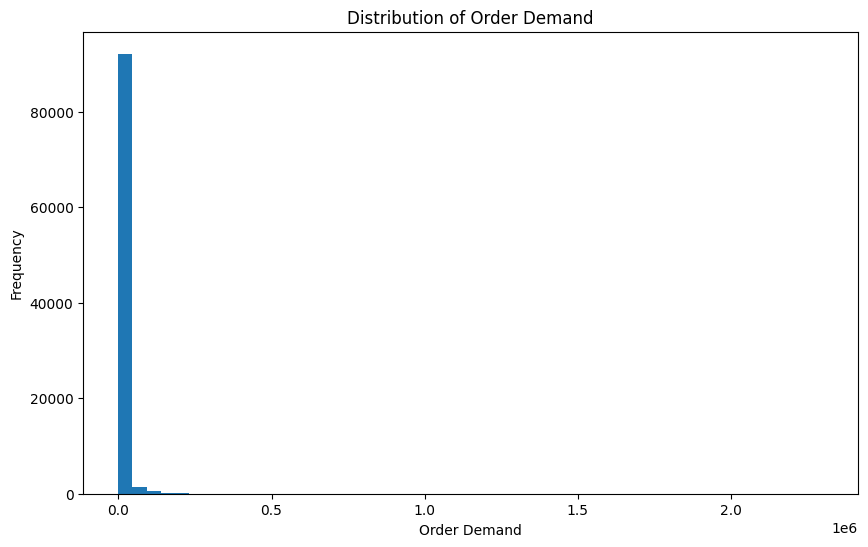

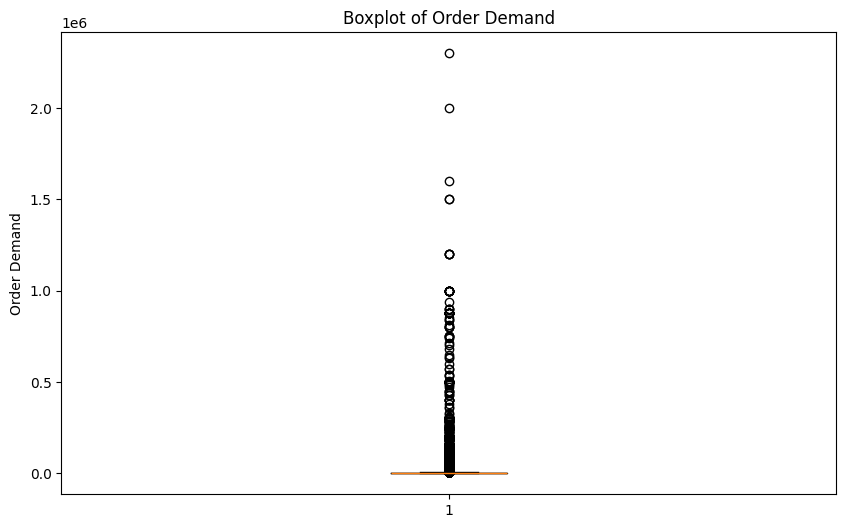

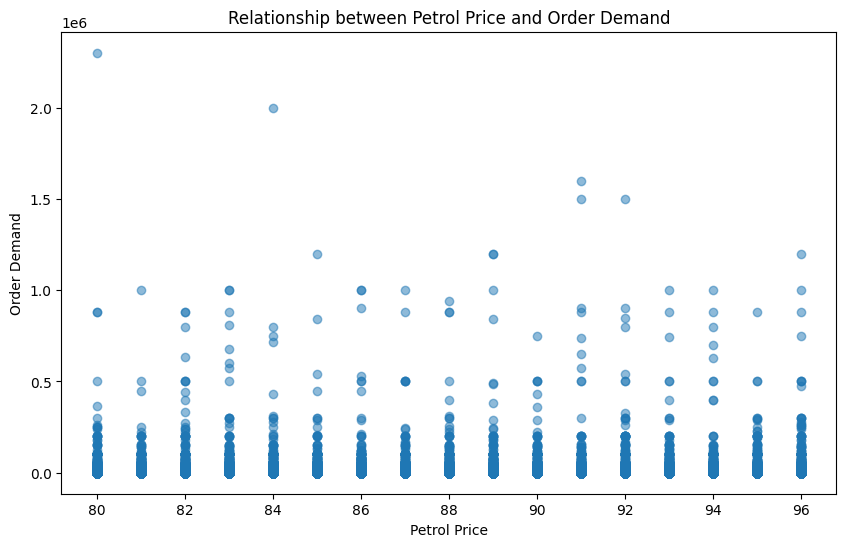

In [ ]:
# Analyze the distribution of the target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Order_Demand'], bins=50)
plt.xlabel('Order Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Order Demand')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df['Order_Demand'])
plt.ylabel('Order Demand')
plt.title('Boxplot of Order Demand')
plt.show()

# Explore relationships between target and other features (example with 'Petrol_price')
plt.figure(figsize=(10, 6))
plt.scatter(df['Petrol_price'], df['Order_Demand'], alpha=0.5)  # Adjust alpha for visibility
plt.xlabel('Petrol Price')
plt.ylabel('Order Demand')
plt.title('Relationship between Petrol Price and Order Demand')
plt.show()

## Data cleaning


Clean the data by handling outliers in the 'Order_Demand' column and converting the 'Date' column to datetime objects.


<ipython-input-6-ac60c7366ce3>:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


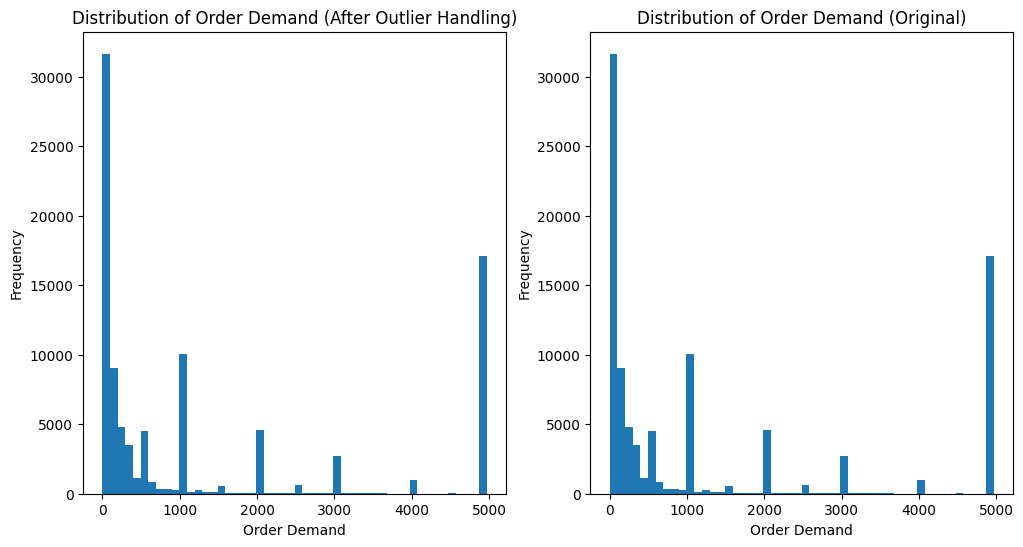

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate IQR for 'Order_Demand'
Q1 = df['Order_Demand'].quantile(0.25)
Q3 = df['Order_Demand'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['Order_Demand'] = df['Order_Demand'].clip(lower=lower_bound, upper=upper_bound)

# Visualize 'Order_Demand' distribution before and after outlier handling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Order_Demand'], bins=50)
plt.xlabel('Order Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Order Demand (After Outlier Handling)')

# Convert 'Date' to datetime objects, handling various formats
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
    # Attempt to convert the remaining invalid dates using a more flexible format
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
except ValueError as e:
    print(f"Error converting 'Date' column: {e}")

plt.subplot(1,2,2)
plt.hist(df['Order_Demand'], bins=50)
plt.xlabel('Order Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Order Demand (Original)')
plt.show()

#**EDA**

<ipython-input-7-61eab9609c48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product_Code",data=df[: 30],palette="summer")


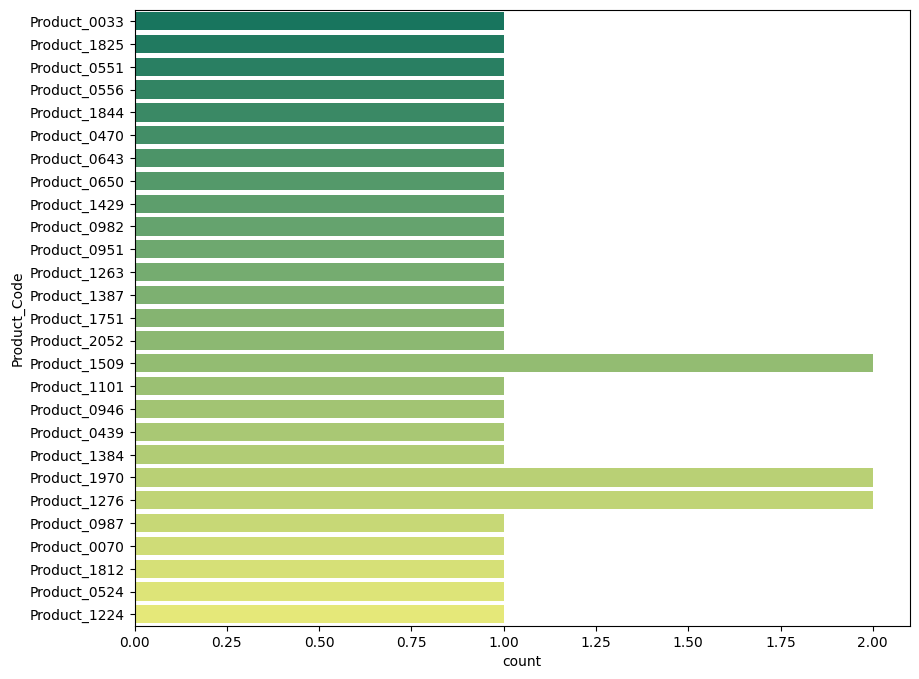

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Code",data=df[: 30],palette="summer")
plt.show()

<ipython-input-8-5951811f54a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Warehouse",data=df,palette="winter")


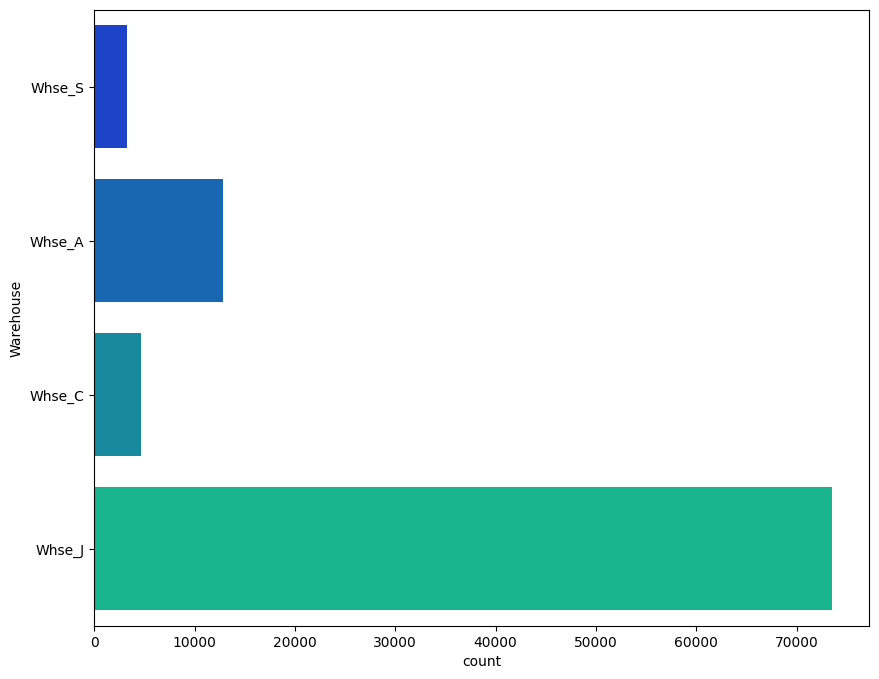

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y="Warehouse",data=df,palette="winter")
plt.show()

<ipython-input-9-ae39674884e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product_Category",data=df,palette="hot")


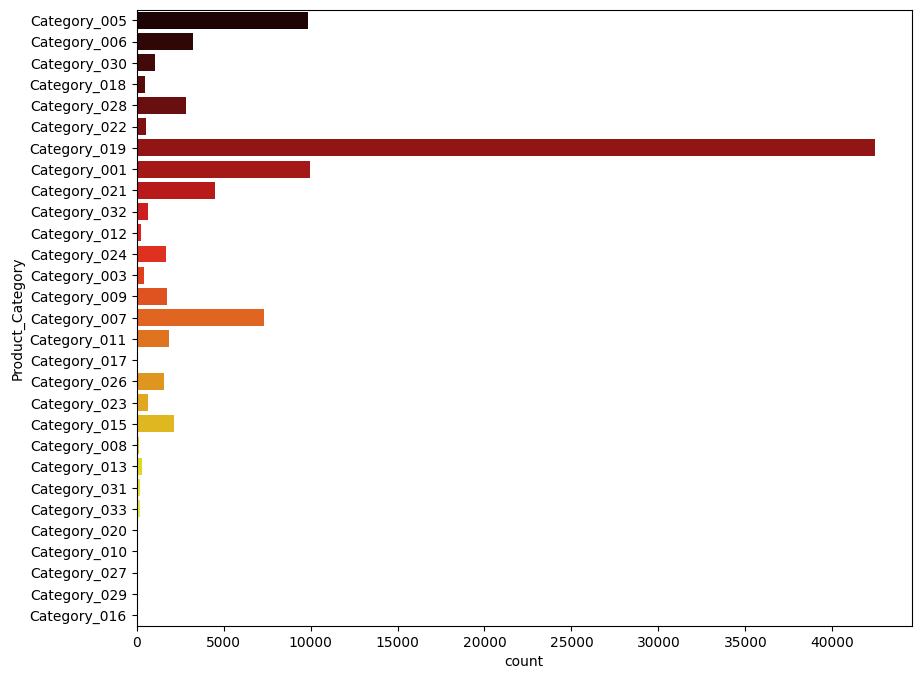

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y="Product_Category",data=df,palette="hot")
plt.show()

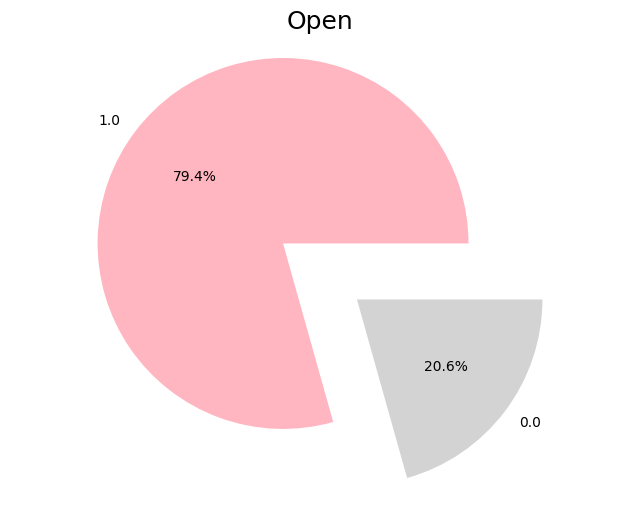

In [ ]:
plt.figure(figsize=(8,6))
myexplode = [0.2, 0.3]
op= df['Open'].value_counts()
plt.pie(op.values, labels=op.index, autopct= '%1.1f%%', colors=['lightpink','lightgrey'],explode=myexplode)
plt.axis("equal")
plt.title('Open',fontsize=18)
plt.show()

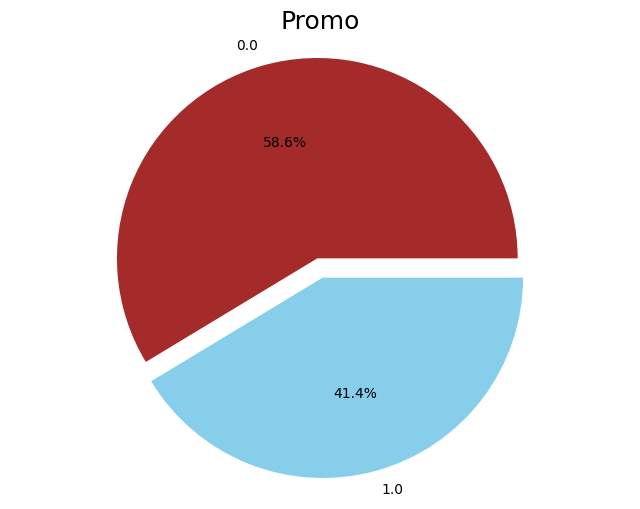

In [ ]:
plt.figure(figsize=(8,6))
myexplode = [0.1, 0.0]
pro= df['Promo'].value_counts()
plt.pie(pro.values, labels=pro.index, autopct= '%1.1f%%', colors=['brown','skyblue'],explode=myexplode)
plt.axis("equal")
plt.title('Promo',fontsize=18)
plt.show()

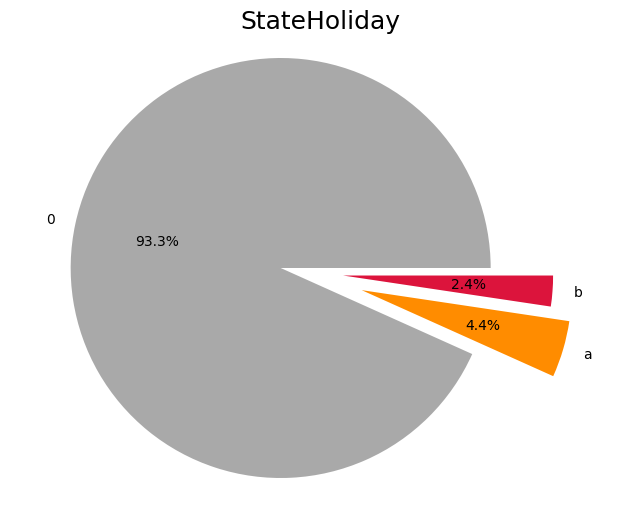

In [ ]:
plt.figure(figsize=(8,6))
myexplode = [0.1, 0.3,0.2]
state= df['StateHoliday'].value_counts()
plt.pie(state.values, labels=state.index, autopct= '%1.1f%%', colors=['darkgrey','darkorange',"crimson"],explode=myexplode)
plt.axis("equal")
plt.title('StateHoliday',fontsize=18)
plt.show()

## Data wrangling

Extracting Features from Date and Performed onehot encoding on categorical columns


In [ ]:
import pandas as pd

# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['IsHolidaySeason'] = df['Month'].isin([11, 12]).astype(int)

# One-hot encode categorical features
categorical_cols = ['Product_Category', 'Warehouse', 'Product_Code']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())

,Product_id,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,Year,Month,...,Product_Code_Product_2163,Product_Code_Product_2164,Product_Code_Product_2165,Product_Code_Product_2166,Product_Code_Product_2167,Product_Code_Product_2168,Product_Code_Product_2169,Product_Code_Product_2170,Product_Code_Product_2171,Product_Code_Product_2172
0,786725,2016-03-01,4970,1.0,0.0,0,0.0,91.0,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False
1,786743,2016-03-01,4970,1.0,0.0,0,0.0,85.0,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False
2,786967,2016-03-01,3000,1.0,0.0,0,0.0,85.0,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False
3,786856,2016-03-01,1000,1.0,0.0,0,0.0,93.0,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False
4,899538,2016-03-01,7,1.0,0.0,0,0.0,95.0,2016.0,3.0,...,False,False,False,False,False,False,False,False,False,False


## Feature engineering

Further refine features for demand forecasting.  Scale numerical features and create interaction terms.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Identify numerical features to scale
numerical_features = ['Petrol_price', 'Order_Demand', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear']

# Normailzation of numerical cols b/w to scale down them in range:[0,1]
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# Create interaction terms
df['PromoSchoolHoliday'] = df['Promo'] * df['SchoolHoliday']
df['MonthDayOfWeek'] = df['Month'] * df['DayOfWeek']

# Remove original features after creating interactions (optional but often helpful)
df = df.drop(['Promo', 'SchoolHoliday', 'Month', 'DayOfWeek'], axis=1)


display(df.head())

,Product_id,Date,Order_Demand,Open,StateHoliday,Petrol_price,Year,Day,WeekOfYear,IsHolidaySeason,...,Product_Code_Product_2165,Product_Code_Product_2166,Product_Code_Product_2167,Product_Code_Product_2168,Product_Code_Product_2169,Product_Code_Product_2170,Product_Code_Product_2171,Product_Code_Product_2172,PromoSchoolHoliday,MonthDayOfWeek
0,786725,2016-03-01,1.000000,1.0,0,0.6875,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0.0,0.030303
1,786743,2016-03-01,1.000000,1.0,0,0.3125,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0.0,0.030303
2,786967,2016-03-01,0.603622,1.0,0,0.3125,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0.0,0.030303
3,786856,2016-03-01,0.201207,1.0,0,0.8125,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0.0,0.030303
4,899538,2016-03-01,0.001408,1.0,0,0.9375,0.0,0.0,0.153846,0,...,False,False,False,False,False,False,False,False,0.0,0.030303


In [ ]:
df['StateHoliday'].value_counts()

,count
StateHoliday,
0,88031
a,4111
b,2230


In [ ]:
df['StateHoliday'].replace({'a': 1, 'b': 2}, inplace=True)

<ipython-input-16-626388b3906a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['StateHoliday'].replace({'a': 1, 'b': 2}, inplace=True)


In [ ]:
df['StateHoliday'].value_counts()

,count
StateHoliday,
0,88031
1,4111
2,2230


## Data splitting


Split the data into training, validation, and testing sets.


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np

# Sort the DataFrame by 'Date'
df = df.sort_values(by='Date')

# Define the target variable
target_column = 'Order_Demand'

# Separate features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]


# Split the data into training, validation, and testing sets
train_size = int(0.7 * len(df))
val_size = int(0.15 * len(df))
test_size = len(df) - train_size - val_size

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]


# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (66061, 2119)
y_train shape: (66061,)
X_val shape: (14155, 2119)
y_val shape: (14155,)
X_test shape: (14157, 2119)
y_test shape: (14157,)


## Model training




Training the XGBRegressor, and LGBMRegressor models and evaluate their performance using Mean Absolute Error (MAE).



In [ ]:
import numpy as np

# Convert all columns to numeric types in X_train and X_val
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
for col in X_val.columns:
    X_val[col] = pd.to_numeric(X_val[col], errors='coerce')

# Fill any NaN values resulting from the conversion with 0
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

<ipython-input-19-4018ffdc10f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
<ipython-input-19-4018ffdc10f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[col] = pd.to_numeric(X_val[col], errors='coerce')


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66061 entries, 14877 to 55003
Columns: 2119 entries, Product_id to MonthDayOfWeek
dtypes: bool(2108), float64(8), int64(3)
memory usage: 138.9 MB


In [ ]:


# Now, try training the models again
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize models
xgb_model = xgb.XGBRegressor(enable_categorical=False) # disable categorical handling
rf_model = RandomForestRegressor()
lgb_model = lgb.LGBMRegressor()


In [ ]:
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_preds = xgb_model.predict(X_val)

# Evaluate models
xgb_mae = mean_absolute_error(y_val, xgb_preds)

print(f"XGBoost MAE: {xgb_mae}")


XGBoost MAE: 0.15497184665136832


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14157 entries, 73947 to 94054
Columns: 2119 entries, Product_id to MonthDayOfWeek
dtypes: bool(2108), datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 29.8+ MB


In [ ]:
# Convert all columns to numeric types in X_test
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Fill any NaN values resulting from the conversion with 0
X_test = X_test.fillna(0)


<ipython-input-24-5e7fef009c5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = pd.to_numeric(X_test[col], errors='coerce')


In [ ]:
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)
lgb_mae = mean_absolute_error(y_val, lgb_preds)
print(f"LightGBM MAE: {lgb_mae}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train set: 66061, number of used features: 813
[LightGBM] [Info] Start training from score 0.274990
LightGBM MAE: 0.15587921662036583


#T**o determine if your XGBoost and LGBBOOST model is neither overfitting nor underfitting**

Interpretation:

**Overfitting**: Training error much lower than testing error

**Underfitting**: Both errors are high and similar

**Good fit**: Both errors are low and relatively close

In [ ]:
# Calculate errors on both training and test sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")
print(f"Difference: {abs(train_mae - test_mae):.4f}")

Training MAE: 0.1429
Testing MAE: 0.1534
Difference: 0.0105


In [ ]:
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")
print(f"Difference: {abs(train_mae - test_mae):.4f}")

Training MAE: 0.1496
Testing MAE: 0.1538
Difference: 0.0042


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import lightgbm as lgb
# from sklearn.metrics import mean_absolute_error

# # ... (your existing code for data loading, preprocessing, and feature engineering)

# # Sort the DataFrame by 'Date'
# df = df.sort_values(by='Date')

# # Define the target variable
# target_column = 'Order_Demand'

# # Separate features (X) and target (y)
# X = df.drop(target_column, axis=1)
# y = df[target_column]

# # Create TimeSeriesSplit object
# tscv = TimeSeriesSplit(n_splits=5)  # Adjust the number of splits as needed

# # Initialize lists to store evaluation metrics
# mae_scores_xgb = []
# mae_scores_lgb = []

# for col in X.columns:
#   X[col] = pd.to_numeric(X[col], errors='coerce')
# X = X.fillna(0)

# train_size = int(0.8 * len(df))  # Adjust the percentage as needed
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # Loop through the folds for training and validation
# for train_index, val_index in tscv.split(X):
#     X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[val_index]
#     # print("train_index:",train_index,"val_index: ",val_index)

#     # Convert to numeric and fill NaN (as you did before)
# #     for col in X.columns:
# #         X[col] = pd.to_numeric(X[col], errors='coerce')
# #     for col in X_val.columns:
# #         X_val[col] = pd.to_numeric(X_val[col], errors='coerce')
# #     X_train = X_train.fillna(0)
# #     X_val = X_val.fillna(0)

# #     # Initialize and train XGBoost
#     xgb_model = xgb.XGBRegressor(enable_categorical=False)
#     xgb_model.fit(X_train, y_train)
#     xgb_preds = xgb_model.predict(X_val)
#     xgb_mae = mean_absolute_error(y_val, xgb_preds)
#     mae_scores_xgb.append(xgb_mae)

#     # Initialize and train LightGBM
#     lgb_model = lgb.LGBMRegressor()
#     lgb_model.fit(X_train, y_train)
#     lgb_preds = lgb_model.predict(X_val)
#     lgb_mae = mean_absolute_error(y_val, lgb_preds)
#     mae_scores_lgb.append(lgb_mae)

# # Calculate average MAE across folds
# avg_mae_xgb = np.mean(mae_scores_xgb)
# avg_mae_lgb = np.mean(mae_scores_lgb)
# print(f"Average XGBoost MAE across folds: {avg_mae_xgb}")
# print(f"Average LightGBM MAE across folds: {avg_mae_lgb}")
# # print("final_train:",train_index)
# # print("final_val:",val_index)

# # --- Testing ---
# # Train final models on the entire training data (or data from the last fold)
# final_xgb_model = xgb.XGBRegressor(enable_categorical=False)
# final_xgb_model.fit(X.iloc[train_index], y.iloc[train_index])  # Using data from last fold

# final_lgb_model = lgb.LGBMRegressor()
# final_lgb_model.fit(X.iloc[train_index], y.iloc[train_index])  # Using data from last fold

# # Prepare test data (convert to numeric, fill NaN)
# # for col in X_test.columns:
# #     X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
# # X_test = X_test.fillna(0)

# # Make predictions on the test set
# xgb_test_preds = final_xgb_model.predict(X_test)
# lgb_test_preds = final_lgb_model.predict(X_test)

# # # Evaluate on the test set
# xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)
# lgb_test_mae = mean_absolute_error(y_test, lgb_test_preds)

# print(f"XGBoost Test MAE: {xgb_test_mae}")
# print(f"LightGBM Test MAE: {lgb_test_mae}")

#**Conclusion**:
Overall, both XGBoost and LightGBM seem to be performing reasonably well, with XGBoost showing slightly better generalization. The slight overfitting observed in LightGBM might not be a major concern, especially given the relatively small difference between the cross-validation and test scores.